# Mean Force Integration

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

Total no. of Gaussians analysed: 5000
|500/5000|==> Average Mean Force Error: 46.81571254991083
|1000/5000|==> Average Mean Force Error: 47.93007046868163
|1500/5000|==> Average Mean Force Error: 42.97661774438682
|2000/5000|==> Average Mean Force Error: 28.550988978795214
|2500/5000|==> Average Mean Force Error: 23.438665893875974
|3000/5000|==> Average Mean Force Error: 21.35661651414203
|3500/5000|==> Average Mean Force Error: 21.406106296538688
|4000/5000|==> Average Mean Force Error: 19.9032576844966
|4500/5000|==> Average Mean Force Error: 17.307613661035226
|5000/5000|==> Average Mean Force Error: 17.231535568913365


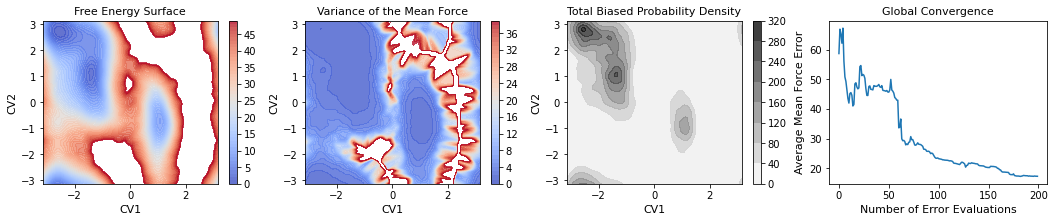

In [1]:
import numpy as np
from pyMFI import MFI

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = 200, WellTempered=1, nhills=5000, periodic=1)

#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe_map, ofe_history)




Total no. of Gaussians analysed: 5000
|50/5000|==> Average Mean Force Error: 4.452847377883998
|100/5000|==> Average Mean Force Error: 6.646430097197676
|150/5000|==> Average Mean Force Error: 5.707144878033201
|200/5000|==> Average Mean Force Error: 6.132009465012209
|250/5000|==> Average Mean Force Error: 5.835921482090692
|300/5000|==> Average Mean Force Error: 6.1352482078362325
|350/5000|==> Average Mean Force Error: 4.550638570058045
|400/5000|==> Average Mean Force Error: 4.466593952029206
|450/5000|==> Average Mean Force Error: 4.9375278333458565
|500/5000|==> Average Mean Force Error: 6.109995340870951
|550/5000|==> Average Mean Force Error: 6.090381042057575
|600/5000|==> Average Mean Force Error: 5.3526219950183105
|650/5000|==> Average Mean Force Error: 6.585971274905328
|700/5000|==> Average Mean Force Error: 6.184289581260246
|750/5000|==> Average Mean Force Error: 6.297660147643424
|800/5000|==> Average Mean Force Error: 8.211200141015878
|850/5000|==> Average Mean Force

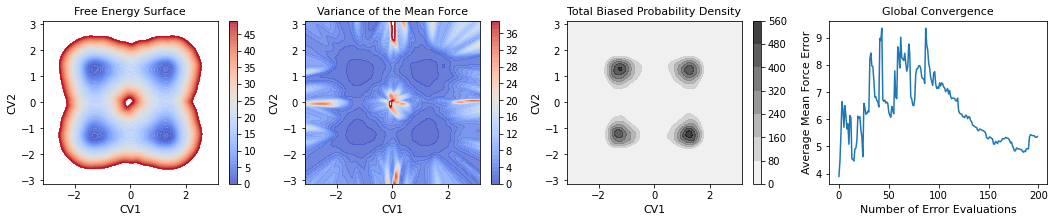

In [2]:
#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_potential")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_potential")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 100, error_pace = 200, nhills=5000)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

#Simpler integration test
[X, Y, FES2] = MFI.intg_2D(Ftot_x, Ftot_y) 

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe_map, ofe_history)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

Total no. of Gaussians analysed: 500
|50/500|==> Average Mean Force Error: 5.6875950811568945
|100/500|==> Average Mean Force Error: 8.779629680358887
|150/500|==> Average Mean Force Error: 5.022837277737977
|200/500|==> Average Mean Force Error: 5.057944427173329
|250/500|==> Average Mean Force Error: 4.940921872609529
|300/500|==> Average Mean Force Error: 4.946310864668545
|350/500|==> Average Mean Force Error: 4.8590019347702995
|400/500|==> Average Mean Force Error: 5.46266230819645
|450/500|==> Average Mean Force Error: 5.594902180180585
|500/500|==> Average Mean Force Error: 7.351110665317271
Total no. of Gaussians analysed: 500
|50/500|==> Average Mean Force Error: 9.079051555167734
|100/500|==> Average Mean Force Error: 7.497985860821931
|150/500|==> Average Mean Force Error: 6.439361074670637
|200/500|==> Average Mean Force Error: 8.8692005203786
|250/500|==> Average Mean Force Error: 8.553375102597519
|300/500|==> Average Mean Force Error: 8.144378099030684
|350/500|==> Aver

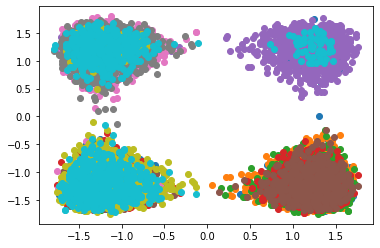

In [40]:

nhills = 500
master = []
all_hills= []
ipos=1.3*(2 * np.random.rand(2) - 1)
FP = np.zeros((101,101))

# Short bursts with 50% convergence 50% exploration

for simulation in np.arange(0,10): 
    #RUN short sim from random location
    #langevin.run_2D(ipos=ipos,tag=simulation)
    #!plumed pesmd < input  >/dev/null
    #Read the HILLS file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name="position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 10, error_pace = 10, nhills=nhills)
    master.append([Ftot_den, Ftot_x, Ftot_y])
    FP += Ftot_den
    #if np.random.rand(1)>=0.3: 
    #    ipos=(X[np.unravel_index(np.argmax(ofe_map, axis=None), ofe_map.shape)],Y[np.unravel_index(np.argmax(ofe_map, axis=None), ofe_map.shape)])
    #else:
    ipos=1.3*(2 * np.random.rand(2) - 1)
    

    

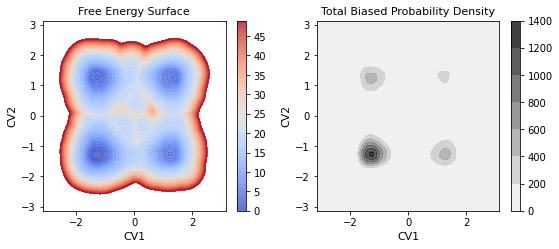

In [42]:

[Ftot_den_patch, Ftot_x_patch, Ftot_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x_patch, Ftot_y_patch)

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch)



Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.713730995019623
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 11.942457752409057
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 9.161907235890348
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 10.148007387422108
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 8.227631301166594
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 9.675646010971194
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 10.832985123113536
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 12.625744092063904
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 10.442663239597037
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 8.67997901322928
Total no. of Gaussians analysed: 500
|500/500|==> Averag

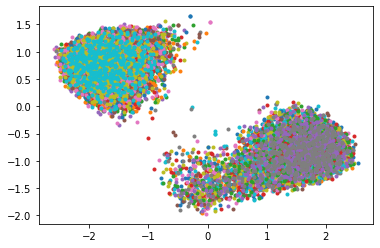

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin


master = []
all_hills= []
ipos=1.3*(2 * np.random.rand(2) - 1)
FP = np.zeros((101,101))

for simulation in np.arange(0,40): 
    #RUN short sim from random location
    langevin.run_2D_Invernizzi(ipos=ipos,tag=simulation)
    !plumed pesmd < input  >/dev/null
    #Read the HILLS file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.12, kT = 1, log_pace = 1, error_pace = 1, nhills=-1)
    master.append([Ftot_den, Ftot_x, Ftot_y])
    FP += Ftot_den
    ipos=1.3*(2 * np.random.rand(2) - 1)
    

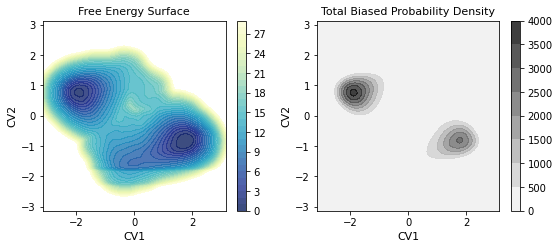

In [4]:

[Ftot_den_patch, Ftot_x_patch, Ftot_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.intg_2D(Ftot_x_patch, Ftot_y_patch)

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch)
